# BUSINESS PROBLEM

The Tanzanian Ministry of Water (TMOW) is having trouble keeping track of all the water pumps that are in operation around the country. They would like a way of predicting which wells are non-functioning or which require some maintenance. 

The aim of this project is to help the TMOW assign predictions to all its wells in the form of the following categories: 

- The well is functional
- The well is functional but needs repair
- The well is non functional

In [119]:
!ls

Data Minining Headings.rtf        SubmissionFormat.csv
LICENSE.md                        dependent_training_set.csv
PIU Data analysis and clean.ipynb independent_test_set.csv
PIU Folder ID file.ipynb          independent_training_set.csv
README.md                         smart.gif


In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline

In [238]:
pd.set_option('display.max_columns', None)

In [121]:
df1 = pd.read_csv("independent_training_set.csv") #import predictor df
df2 = pd.read_csv("dependent_training_set.csv") #import dependent df

In [122]:
df1.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [123]:
df1.shape

(59400, 40)

In [124]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

In [125]:
df2.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [126]:
df2 = df2.rename(columns={'id': 'id_new'})

In [127]:
df2.head()

,id_new,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [128]:
df2.shape #check we're working with the same number of rows in feature and target set. 

(59400, 2)

In [129]:
#we've concatenated the dfs to ensure consistent cleaning of the data. 
df3 = pd.concat([df1, df2], axis=1)

In [130]:
df3.head(10)
df3.iloc[:,19:30]


,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment
0,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually
1,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay
2,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket
3,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay
4,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay
5,GeoData Consultants Ltd,VWC,Zingibali,True,2009,submersible,submersible,submersible,vwc,user-group,pay per bucket
6,GeoData Consultants Ltd,VWC,NaN,True,0,swn 80,swn 80,handpump,vwc,user-group,never pay
7,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown
8,GeoData Consultants Ltd,VWC,NaN,True,0,india mark ii,india mark ii,handpump,vwc,user-group,never pay
9,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay


In [131]:
df3.date_recorded.dtypes

dtype('O')

### Maybe we might want to access some date components so let's change the date_recorded values into a date-time value. 

In [132]:
#df['Datetime'] = pd.to_datetime(df['Datetime'], format="%m/%d/%Y, %H:%M:%S")
df3['date_recorded'] = pd.to_datetime(df3['date_recorded'], format="%Y-%m-%d")

In [133]:
df3.date_recorded.dtypes

dtype('<M8[ns]')

In [134]:
df3["date_recorded"].dt.month.head() #double check our conversion has worked. 

0    3
1    3
2    2
3    1
4    7
Name: date_recorded, dtype: int64

#### Could be a good idea to visualise if faulty wells get reported in certain months, and then review what this means ... if anything!!

In [135]:
import calendar
mth_reported = df3[['date_recorded', 'status_group']]
mth_reported['month_recorded'] = df3['date_recorded'].dt.month

new_order = ['month_recorded', 'status_group']
mth_reported=mth_reported.reindex(columns=new_order)
mth_reported['counter'] = 1
mth_reported = mth_reported.groupby(['month_recorded', 'status_group'])['counter'].sum().to_frame()
#mth_reported['month_recorded']=[calendar.month_name[x] for x in range(1,13)]
#mth_reported['month_recorded'] = mth_reported['month_recorded'].apply(lambda x: calendar.month_abbr[x])
mth_reported

counter
month_recorded status_group                    
1              functional                  2609
               functional needs repair      807
               non functional              2938
2              functional                  6847
               functional needs repair      934
               non functional              4621
3              functional                 11058
               functional needs repair      900
               non functional              5978
4              functional                  2050
               functional needs repair      438
               non functional              1482
5              functional                   202
               functional needs repair       10
               non functional               124
6              functional                   270
               functional needs repair        9
               non functional                67
7              functional                  3475
               functional needs repair      549
               non functional              2904
8              functional                  1719
               functional needs repair      253
               non functional              1392
9              functional                   214
               functional needs repair       10
               non functional               104
10             functional                  2784
               functional needs repair      316
               non functional              2366
11             functional                   666
               functional needs repair       70
               non functional               613
12             functional                   365
               functional needs repair       21
               non functional               235

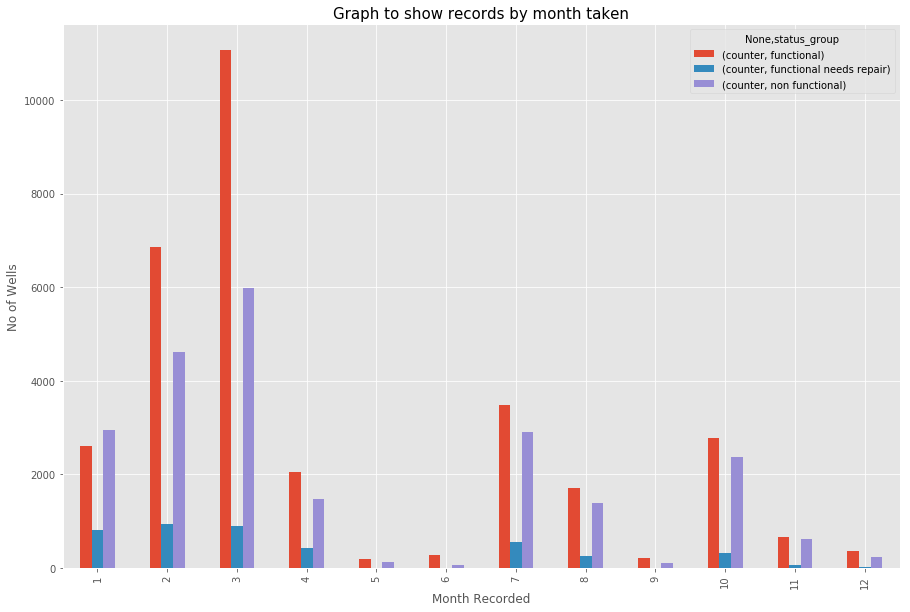

In [136]:
mth_reported.unstack().plot(kind='bar', figsize=(15,10));

plt.title('Graph to show records by month taken', fontsize=15)
plt.ylabel('No of Wells')
plt.xlabel('Month Recorded')
plt.style.use('ggplot')
plt.show()

In [137]:
print(df3.date_recorded.min(), df3.date_recorded.max())

2002-10-14 00:00:00 2013-12-03 00:00:00


We can see that well condition reporting seems to happen at certain times of the year namely Feb and March and then
less so in Jan, Apr, Jul, Aug, Oct. Very little records are made in May, Jun, Sept, Nov and Dec!!! 
It's possible that in these 'down' months some wells are becoming broken but not being reported until later. 
Also the reporting cycle is not clear, the earliest record is from 2002, we must assume that this means no one has checked since and there's been no record of an change in the interim period. 

Maybe we should also check what years the wells were last recorded as a view on the whole data set!!

General checks of the features continue

In [138]:
df3.num_private.value_counts()[0:5]
#What does this mean, there are no notes on this feature and overwhelmingly sit in value = 0

0    58643
6       81
1       73
5       46
8       46
Name: num_private, dtype: int64

In [139]:
df3.construction_year.value_counts()[0:5]
#Almost 1/3 of data set has no recorded year of construction! What should we do with these entries?

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
Name: construction_year, dtype: int64

### To understand whether we might want to keep the construction_year field where a value has been recorded we will generate a visualisation of the available figures to understand if it's worth keeping the feature?

In [275]:
import warnings
warnings.filterwarnings("ignore")

In [141]:
yr_built_cond = df3[['construction_year', 'status_group']] #Create dataframe of required features
yr_built_cond['counter'] = 1 #Set up a counter column to create numbers of each well status
df = yr_built_cond[yr_built_cond.construction_year != 0] #Remove the heavy yr=0 rows to enable easy plot
df4 = df.groupby(['construction_year', 'status_group'])['counter'].sum().to_frame() #Create the required frame
df4.tail(6)

counter
construction_year status_group                    
2012              functional                   726
                  functional needs repair       51
                  non functional               307
2013              functional                   102
                  functional needs repair        1
                  non functional                73

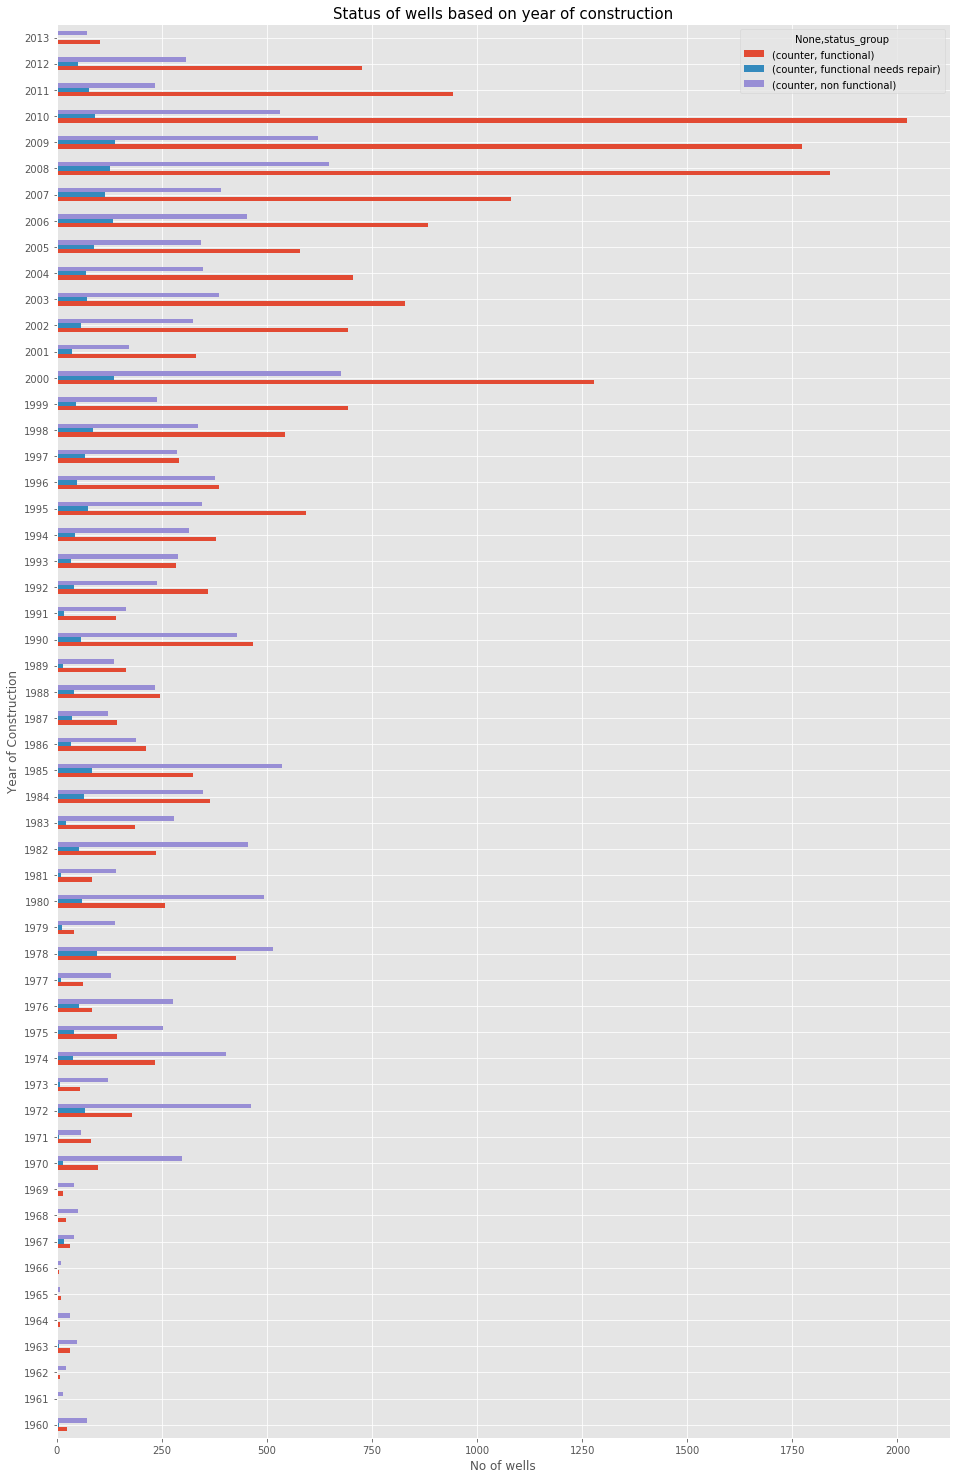

In [142]:
#Note that this plot does not include the information for construction year = 0 as it was making the graph ilegible. 
#A second plot for this information is plotted under. 
df4.unstack().plot(kind='barh', figsize=(16,26));

plt.title('Status of wells based on year of construction', fontsize=15)
plt.ylabel('Year of Construction')
plt.xlabel('No of wells')
plt.style.use('ggplot')
plt.show()

In [143]:
yr_zero = yr_built_cond[yr_built_cond.construction_year == 0] 
df5 = yr_zero.groupby(['construction_year', 'status_group'])['counter'].sum().to_frame()
df5.tail(10)

counter
construction_year status_group                    
0                 functional                 10555
                  functional needs repair     1789
                  non functional              8365

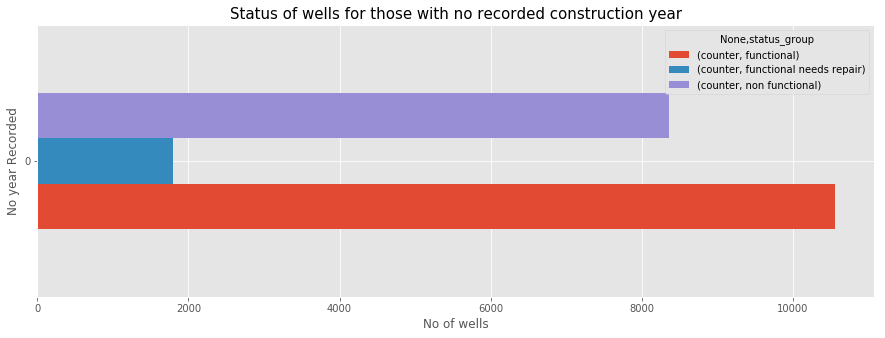

In [144]:
df5.unstack().plot(kind='barh', figsize=(15,5));

plt.title('Status of wells for those with no recorded construction year', fontsize=15)
plt.ylabel('No year Recorded')
plt.xlabel('No of wells')
plt.style.use('ggplot')
plt.show()

Takeaways from the above graphs are:
1) There is a large proportion of wells installed pre 1985 that are now non_functional
2) Install dates bewteen mid 80s and mid 90s correlate with a more even split of functional and non functional 
3) There are a large proportion of wells installed since the late 90s that are still functional
4) The disproportionate number of wells without a construction date leads me to think that this is going to considerably affect the performance of our final model so advise we a) drop whole column or b) drop the 0 year figures! 

Further investigations...
a) Did certain types of wells get installed in pre 1985 or were certain companies active before this time

### Next we'll take a quick look at the target feature to see roughly how this is split up across all the data. 

In [145]:
depend_split = df3.status_group.value_counts()
depend_split

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [146]:
depend_split.index[0:3]

Index(['functional', 'non functional', 'functional needs repair'], dtype='object')

In [147]:
labels=['functional', 'nonfunctional', 'functional needs repair']

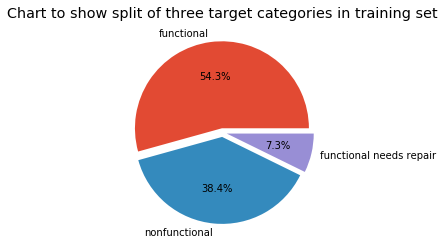

In [148]:
plt.pie(depend_split, explode=(0.05, 0.05, 0.05),  labels=labels, autopct='%1.1f%%');
plt.title('Chart to show split of three target categories in training set');


### We'll start to narrow down the features we want to use in the following sections. We have a provisionally selected around 15 features for further investigation and subject to cleaning these will form the basis of our independent variables. 

In [149]:
df3['amount_tsh'].unique() 
#This fetaure relates to static head which I know is important for ideal pump operation so we'll keep this feature!

array([6.00e+03, 0.00e+00, 2.50e+01, 2.00e+01, 2.00e+02, 5.00e+02,
       5.00e+01, 4.00e+03, 1.50e+03, 6.00e+00, 2.50e+02, 1.00e+01,
       1.00e+03, 1.00e+02, 3.00e+01, 2.00e+03, 4.00e+02, 1.20e+03,
       4.00e+01, 3.00e+02, 2.50e+04, 7.50e+02, 5.00e+03, 6.00e+02,
       7.20e+03, 2.40e+03, 5.00e+00, 3.60e+03, 4.50e+02, 4.00e+04,
       1.20e+04, 3.00e+03, 7.00e+00, 2.00e+04, 2.80e+03, 2.20e+03,
       7.00e+01, 5.50e+03, 1.00e+04, 2.50e+03, 6.50e+03, 5.50e+02,
       3.30e+01, 8.00e+03, 4.70e+03, 7.00e+03, 1.40e+04, 1.30e+03,
       1.00e+05, 7.00e+02, 1.00e+00, 6.00e+01, 3.50e+02, 2.00e-01,
       3.50e+01, 3.06e+02, 8.50e+03, 1.17e+05, 3.50e+03, 5.20e+02,
       1.50e+01, 6.30e+03, 9.00e+03, 1.50e+02, 1.20e+05, 1.38e+05,
       3.50e+05, 4.50e+03, 1.30e+04, 4.50e+04, 2.00e+00, 1.50e+04,
       1.10e+04, 5.00e+04, 7.50e+03, 1.63e+04, 8.00e+02, 1.60e+04,
       3.00e+04, 5.30e+01, 5.40e+03, 7.00e+04, 2.50e+05, 2.00e+05,
       2.60e+04, 1.80e+04, 2.60e+01, 5.90e+02, 9.00e+02, 9.00e

In [150]:
df3['gps_height'].unique()

array([1390, 1399,  686, ...,  -90, 2091, 2366])

In [151]:
df3['gps_height'].isna().sum() 
#The altiitude of the well seems like it could be informative. We'll keep this and assume we're measuring in mtr. 

0

In [152]:
df3['basin'].unique()
#This geological location could be useful but proxies for this may be more easily accessed with other predictors. 

array(['Lake Nyasa', 'Lake Victoria', 'Pangani',
       'Ruvuma / Southern Coast', 'Internal', 'Lake Tanganyika',
       'Wami / Ruvu', 'Rufiji', 'Lake Rukwa'], dtype=object)

In [39]:
print(df3.region.unique(),'\n', df3.region_code.unique(),'\n', df3.region_code.unique(), '\n', df3.ward.unique())
#It would be good to include a political location to complement the geological location. However our number of 
#categories is rising!! I'm not sure what that means!! If pushed I will select the region feature. 

['Iringa' 'Mara' 'Manyara' 'Mtwara' 'Kagera' 'Tanga' 'Shinyanga' 'Tabora'
 'Pwani' 'Ruvuma' 'Kilimanjaro' 'Rukwa' 'Mwanza' 'Kigoma' 'Lindi' 'Dodoma'
 'Arusha' 'Mbeya' 'Singida' 'Morogoro' 'Dar es Salaam'] 
 [11 20 21 90 18  4 17 14 60 10  3 15 19 16 80  1  6  2 12 13  5  7 99 24
  9  8 40] 
 [11 20 21 90 18  4 17 14 60 10  3 15 19 16 80  1  6  2 12 13  5  7 99 24
  9  8 40] 
 ['Mundindi' 'Natta' 'Ngorika' ... 'Chinugulu' 'Nyamtinga' 'Kinungu']


In [40]:
df3['population'].isna().sum() 
#Good we'd like to use the population feature as it states how many people are likely using the well

0

In [41]:
df3['permit'].unique()

array([False, True, nan], dtype=object)

In [42]:
df3['permit'].isna().sum()
#This number (3056) is a small proportion of the overall data set but maybe we should have a quick check to see if the feature
# may be a good predictor one way or the other. 

3056

In [43]:
df3.permit.value_counts()
#So, pumps with a permit look like they're more than twice as likely to be functional than pumps without a permit. 
#We should keep this predictor and drop the nans!!

True     38852
False    17492
Name: permit, dtype: int64

In [44]:
df3.management.isna().sum()

0

In [45]:
df3.management.unique() 
#we have an 'other' and an 'unknown' value to contend with, we'll ignore other and assume it refers to a mix of
#smaller operators which can exist as a sub-value in their own right (a proxy for a single manager)

array(['vwc', 'wug', 'other', 'private operator', 'water board', 'wua',
       'company', 'water authority', 'parastatal', 'unknown',
       'other - school', 'trust'], dtype=object)

In [46]:
#Let's have a general look to see where any 'unknown' values are?
unknown = df3[df3.isin(['unknown'])].count().to_frame()
unknown.loc[(unknown!=0).any(1)]

,0
installer,1
management,561
management_group,561
payment,8157
payment_type,8157
water_quality,1876
quality_group,1876
quantity,789
quantity_group,789
source,66


In [47]:
#After thinking about 'unknown' values we'll drop them all as they could potentially be contradictory to the and 
#return an inverse value to the truth. We can't include 'unknown' as a proxy for another single value. 
df3.replace('unknown',np.nan, inplace=True)
df3[df3.isin(['unknown'])].count().to_frame()[0:5]

,0
id,0
amount_tsh,0
date_recorded,0
funder,0
gps_height,0


In [48]:
#Now we'll look into the water quality/group predictor
print(df3.water_quality.unique(), '\n', df3.quality_group.unique())

#Not sure we want 'abandoned' in our models so we'll stick with the quality_group predictor and drop the nans

['soft' 'salty' 'milky' nan 'fluoride' 'coloured' 'salty abandoned'
 'fluoride abandoned'] 
 ['good' 'salty' 'milky' nan 'fluoride' 'colored']


In [49]:
df3.source_type.unique() 
#This looks all good, we'll treat 'other' as a single predictor value as we can assume it stands for none of the
#identified source types!! NO WE"VE REMOVED 'OTHER'... 

array(['spring', 'rainwater harvesting', 'dam', 'borehole', 'other',
       'shallow well', 'river/lake'], dtype=object)

In [50]:
#Maybe we should check how many instances of 'other' there are across the board to make sure the impact is relatively
#minimal!!
other = df3[df3.isin(['other'])].count().to_frame()
other.loc[(unknown!=0).any(1)]

#OK I have had second thoughts on keeping the 'other' values in as there are so few of them. We will remove them!

,0
installer,0
management,844
management_group,943
payment,1054
payment_type,1054
water_quality,0
quality_group,0
quantity,0
quantity_group,0
source,212


In [51]:
df3.replace('other',np.nan, inplace=True)
df3[df3.isin(['other'])].count().to_frame()[0:5] #this worked

,0
id,0
amount_tsh,0
date_recorded,0
funder,0
gps_height,0


In [52]:
print(df3.waterpoint_type.unique(), df3.waterpoint_type_group.unique())

#These two predictors seem almost identical except for the standpipes being split into single and multiple. 

['communal standpipe' 'communal standpipe multiple' 'hand pump' nan
 'improved spring' 'cattle trough' 'dam'] ['communal standpipe' 'hand pump' nan 'improved spring' 'cattle trough'
 'dam']


In [53]:
print(df3.extraction_type_class.unique())

['gravity' 'submersible' 'handpump' nan 'motorpump' 'wind-powered'
 'rope pump']


In [54]:
df3.shape

(59400, 42)

In [55]:
df3.isnull().sum()
#OK when we tried to clear out all our null values our dataframe size was reduced by an amount that we weren't 
#expecting. After checking where all the null values are we can see alot of them are located in columns we're
#not interested in e.g scheme name!! Let's drop all the columns we want rid of and then drop null/nan!! Makes sense!

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3656
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type           6430
extraction_type_group     6430
extraction_type_class     6430
management                1405
management_group          1504
payment                   9211
payment_type              9211
water_quality             1876
quality_

In [56]:
df3.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,id_new,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,69572,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,8776,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,34310,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,67743,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,19728,functional


In [57]:
# new = old.filter(['A','B','D'], axis=1)
data = df3.filter(['amount_tsh', 'gps_height', 'basin', 'region', 'population', 'permit', 'extraction_type_class',
                  'management', 'quality_group', 'source_type', 'waterpoint_type_group', 'status_group'], axis =1)
data.head()

,amount_tsh,gps_height,basin,region,population,permit,extraction_type_class,management,quality_group,source_type,waterpoint_type_group,status_group
0,6000.0,1390,Lake Nyasa,Iringa,109,False,gravity,vwc,good,spring,communal standpipe,functional
1,0.0,1399,Lake Victoria,Mara,280,True,gravity,wug,good,rainwater harvesting,communal standpipe,functional
2,25.0,686,Pangani,Manyara,250,True,gravity,vwc,good,dam,communal standpipe,functional
3,0.0,263,Ruvuma / Southern Coast,Mtwara,58,True,submersible,vwc,good,borehole,communal standpipe,non functional
4,0.0,0,Lake Victoria,Kagera,0,True,gravity,NaN,good,rainwater harvesting,communal standpipe,functional


In [58]:
data.shape 

(59400, 12)

In [59]:
#Let's finally drop these null and nan values
data.dropna(inplace=True)

In [60]:
data.shape #Ok we still have a decent data set size!!

(46918, 12)

### Now we need to get some dummies and make som final adjustments before passing the dataframe onto the modelling department!

In [61]:
#the permit column looks good to be converted to binary. 
data.permit = data.permit.astype(int)

In [62]:
data.head() #Good, permit now binary. 

,amount_tsh,gps_height,basin,region,population,permit,extraction_type_class,management,quality_group,source_type,waterpoint_type_group,status_group
0,6000.0,1390,Lake Nyasa,Iringa,109,0,gravity,vwc,good,spring,communal standpipe,functional
1,0.0,1399,Lake Victoria,Mara,280,1,gravity,wug,good,rainwater harvesting,communal standpipe,functional
2,25.0,686,Pangani,Manyara,250,1,gravity,vwc,good,dam,communal standpipe,functional
3,0.0,263,Ruvuma / Southern Coast,Mtwara,58,1,submersible,vwc,good,borehole,communal standpipe,non functional
6,0.0,0,Internal,Shinyanga,0,1,handpump,vwc,good,borehole,hand pump,non functional


### Can we subdivide region into N,S,E,W and Central? 
### Can we subdived extraction into electric and non electric?
### Can we subdivide source type between man made and naturally ocurring


In [63]:
data.head()

,amount_tsh,gps_height,basin,region,population,permit,extraction_type_class,management,quality_group,source_type,waterpoint_type_group,status_group
0,6000.0,1390,Lake Nyasa,Iringa,109,0,gravity,vwc,good,spring,communal standpipe,functional
1,0.0,1399,Lake Victoria,Mara,280,1,gravity,wug,good,rainwater harvesting,communal standpipe,functional
2,25.0,686,Pangani,Manyara,250,1,gravity,vwc,good,dam,communal standpipe,functional
3,0.0,263,Ruvuma / Southern Coast,Mtwara,58,1,submersible,vwc,good,borehole,communal standpipe,non functional
6,0.0,0,Internal,Shinyanga,0,1,handpump,vwc,good,borehole,hand pump,non functional


#### We will group the regions into north, south, east, west and central to reduce the number of dummy cols. 

In [64]:
def myfunc(x): #I'm sure there is a better way to achieve this!
    if x=='Iringa' or x=='Tabora' or x=='Dodoma' or x=='Singida':
        return 'central'
    elif x=='Mara' or x=='Manyara' or x=='Kagera'or x=='Shingyanga' or x=='Kilimanjaro' or x=='Mwanza' or x=='Arusha': 
        return 'north'
    elif x=='Mtwara' or x=='Tanga' or x=='Pwani' or x=='Lindi' or x=='Morogoro':
        return 'east'
    elif x=='Ruvuma':
        return 'south'
    else:
        return 'west'

data['area'] = data.apply(lambda x: myfunc(x.region), axis=1)
data.drop(columns='region').head()

,amount_tsh,gps_height,basin,population,permit,extraction_type_class,management,quality_group,source_type,waterpoint_type_group,status_group,area
0,6000.0,1390,Lake Nyasa,109,0,gravity,vwc,good,spring,communal standpipe,functional,central
1,0.0,1399,Lake Victoria,280,1,gravity,wug,good,rainwater harvesting,communal standpipe,functional,north
2,25.0,686,Pangani,250,1,gravity,vwc,good,dam,communal standpipe,functional,north
3,0.0,263,Ruvuma / Southern Coast,58,1,submersible,vwc,good,borehole,communal standpipe,non functional,east
6,0.0,0,Internal,0,1,handpump,vwc,good,borehole,hand pump,non functional,west


In [65]:
#data.join(pd.get_dummies(data['basin'])).head(1)
# data.join(pd.get_dummies(data=data, columns=['basin', 'extraction_type_class']))
data = pd.get_dummies(data, columns = ['basin', 
                                             'extraction_type_class', 
                                             'management',
                                             'quality_group',
                                             'source_type',
                                             'waterpoint_type_group',
                                             'area'], drop_first = True)
data.drop(columns='region', inplace=True)

In [66]:
data.shape

(46918, 44)

In [67]:
data.head()

,amount_tsh,gps_height,population,permit,status_group,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,...,source_type_shallow well,source_type_spring,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,area_east,area_north,area_south,area_west
0,6000.0,1390,109,0,functional,1,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
1,0.0,1399,280,1,functional,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
2,25.0,686,250,1,functional,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
3,0.0,263,58,1,non functional,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6,0.0,0,0,1,non functional,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


### We've decided to collect the target into a binary classification system to allow for more simple modelling ... we've taken 'functional' = 1 and 'non functional' and 'needs repair' = 0

In [153]:
data.replace('functional needs repair', 'to be repaired', inplace=True)

In [154]:
data.replace('non functional', 'to be repaired', inplace=True)

In [159]:
#This has worked ok, we can see that a possible imbalance in data has also been relaxed with this approach. 
depend_split_new = data.status_group.value_counts()
depend_split_new

functional        28486
to be repaired    18432
Name: status_group, dtype: int64

In [199]:
data.replace('functional', 1, inplace=True)

In [200]:
data.replace('to be repaired', 0, inplace=True)

In [202]:
depend_split_binary = data.status_group.value_counts()
depend_split_binary

1    28486
0    18432
Name: status_group, dtype: int64

## Now we'll get our data ready for modelling

In [203]:
X = data.drop('status_group', axis=1)
y = data['status_group']

In [204]:
X.head()

,amount_tsh,gps_height,population,permit,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,...,source_type_shallow well,source_type_spring,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,area_east,area_north,area_south,area_west
0,6000.0,1390,109,0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
1,0.0,1399,280,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,25.0,686,250,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
3,0.0,263,58,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6,0.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [206]:
y.head() #checking binary classes ok

0    1
1    1
2    1
3    0
6    0
Name: status_group, dtype: int64

### We will split the training data into train and validation datasets

In [276]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_f, X_val, y_train_f, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [277]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [278]:
scaler.fit(X_train_f) #We only fit on the training data

#And we transform the remaining useable data sets
X_train_f_scaled = scaler.transform(X_train_f) 
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

X_train_f_scaled = pd.DataFrame(X_train_f_scaled, columns=X.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

In [279]:
X_train_scaled.head()

,amount_tsh,gps_height,population,permit,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_rope pump,extraction_type_class_submersible,extraction_type_class_wind-powered,management_other - school,management_parastatal,management_private operator,management_trust,management_vwc,management_water authority,management_water board,management_wua,management_wug,quality_group_fluoride,quality_group_good,quality_group_milky,quality_group_salty,source_type_dam,source_type_rainwater harvesting,source_type_river/lake,source_type_shallow well,source_type_spring,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,area_east,area_north,area_south,area_west
0,-0.062546,0.782376,0.773662,0.659965,-0.293937,-0.21545,2.924978,-0.432647,-0.433038,-0.432257,-0.272304,-0.347157,-0.695341,-0.240731,-0.078521,-0.36041,-0.044746,-0.03347,-0.170227,-0.188128,-0.038999,0.676777,-0.113455,-0.248741,-0.229564,-0.359088,-0.063555,0.34198,-0.094612,-0.30299,-0.09937,-0.177784,-0.497968,-0.573474,1.498119,0.727712,-0.005162,-0.704255,-0.114295,-0.515574,-0.644155,-0.225353,1.766121
1,-0.132481,-0.985081,-0.389087,0.659965,-0.293937,-0.21545,-0.341883,-0.432647,-0.433038,2.313440,-0.272304,-0.347157,-0.695341,4.154015,-0.078521,-0.36041,-0.044746,-0.03347,-0.170227,-0.188128,-0.038999,0.676777,-0.113455,-0.248741,-0.229564,-0.359088,-0.063555,0.34198,-0.094612,-0.30299,-0.09937,-0.177784,-0.497968,-0.573474,-0.667504,0.727712,-0.005162,-0.704255,-0.114295,1.939585,-0.644155,-0.225353,-0.566213
2,-0.144822,1.874209,-0.391327,-1.515231,3.402088,-0.21545,-0.341883,-0.432647,-0.433038,-0.432257,-0.272304,-0.347157,-0.695341,-0.240731,-0.078521,-0.36041,-0.044746,-0.03347,-0.170227,-0.188128,-0.038999,0.676777,-0.113455,-0.248741,-0.229564,-0.359088,-0.063555,0.34198,-0.094612,-0.30299,-0.09937,-0.177784,-0.497968,-0.573474,1.498119,0.727712,-0.005162,-0.704255,-0.114295,-0.515574,-0.644155,-0.225353,-0.566213
3,-0.136594,1.453725,0.029861,0.659965,-0.293937,-0.21545,-0.341883,-0.432647,-0.433038,-0.432257,-0.272304,-0.347157,-0.695341,4.154015,-0.078521,-0.36041,-0.044746,-0.03347,-0.170227,-0.188128,-0.038999,0.676777,-0.113455,-0.248741,-0.229564,-0.359088,-0.063555,0.34198,-0.094612,-0.30299,-0.09937,-0.177784,-0.497968,-0.573474,-0.667504,0.727712,-0.005162,-0.704255,-0.114295,-0.515574,1.552421,-0.225353,-0.566213
4,0.060868,-0.621612,0.056746,0.659965,-0.293937,-0.21545,-0.341883,-0.432647,-0.433038,2.313440,-0.272304,-0.347157,1.438144,-0.240731,-0.078521,-0.36041,-0.044746,-0.03347,-0.170227,-0.188128,-0.038999,0.676777,-0.113455,-0.248741,-0.229564,-0.359088,-0.063555,0.34198,-0.094612,-0.30299,-0.09937,-0.177784,-0.497968,1.743758,-0.667504,-1.374169,-0.005162,1.419941,-0.114295,1.939585,-0.644155,-0.225353,-0.566213


## Train a logistic regression with no regularisation

In [280]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(fit_intercept=False, C=1e12, solver='lbfgs')
model_log = log_reg.fit(X_train_f, y_train_f)
model_log

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [281]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.preprocessing import LabelBinarizer

y_pred_train = log_reg.predict(X_train_f)
acc_score = accuracy_score(y_train_f, y_pred_train)

pred_prob = log_reg.predict_proba(X_train_f)
pred_prob = pred_prob[:,1]


print('Training Accuracy: ', acc_score)
print('ROC_AUC: ', roc_auc_score(y_train_f, pred_prob))

Training Accuracy:  0.6502814133946115
ROC_AUC:  0.6581270051770289


In [282]:
y_pred_val = log_reg.predict(X_val)
acc_score_val = accuracy_score(y_val, y_pred_val)

pred_prob = log_reg.predict_proba(X_val)
pred_prob = pred_prob[:,1]


print('Validation Accuracy: ', acc_score_val)
print('ROC_AUC: ', roc_auc_score(y_val, pred_prob))

Validation Accuracy:  0.6444651658452112
ROC_AUC:  0.6497790255191518


### We'll introduce a lasso L1 regularistion to penalise any complexity in the model as follows

In [287]:
# let's see what impact regularisation has on our model
lasso = LogisticRegression(penalty = 'l1', solver='liblinear')
lasso.fit(X_train_f, y_train_f)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [288]:
#First on training data
y_pred_lasso = lasso.predict(X_train_f)

pred_lasso_prob = lasso.predict_proba(X_train_f)[:,1]

lasso_acc = accuracy_score(y_train_f, y_pred_lasso)
lasso_rocauc = roc_auc_score(y_train_f, pred_lasso_prob)

print('Lasso training model has accuracy: ',lasso_acc)
print('Our Lasso ROC_AUC:', lasso_rocauc)


Lasso training model has accuracy:  0.6565424451327139
Our Lasso ROC_AUC: 0.6788461398327634


In [289]:
## And now on the validation data
y_pred_lasso_val = lasso.predict(X_val)
acc_score_lasso_val = accuracy_score(y_val, y_pred_lasso_val)

pred_prob_lasso = log_reg.predict_proba(X_val)
pred_prob_lasso = pred_prob_lasso[:,1]

print('Validation Accuracy Lasso: ', acc_score_lasso_val)
print('ROC_AUC Lasso: ', roc_auc_score(y_val, pred_prob_lasso))

Validation Accuracy Lasso:  0.651525243106434
ROC_AUC Lasso:  0.6497790255191518


### We may be stuck with an accuracy score around 0.65 with logistic regression so let's investigate some other classifiers

## Investigate other classifiers

### Decision Tree Classification and Grid Search CV

In [230]:
from sklearn.tree import DecisionTreeClassifier

In [219]:
import seaborn as sns

In [231]:
#import and instantiate an instance of Stratified K Fold
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=False) #changed to shuffle=false as experiment!

In [220]:
def opt_plots(opt_model):
    
    """
    This function plots our parameter heat map to visualise where our model perfoms best!
    """
    opt = pd.DataFrame(opt_model.cv_results_)
    cols = [col for col in opt.columns if ('mean' in col or 'std' in col) and 'time' not in col]
    params = pd.DataFrame(list(opt.params))
    opt = pd.concat([params,opt[cols]],axis=1,sort=False)
    
    plt.figure(figsize=[15,4])
    plt.subplot(121)
    sns.heatmap(pd.pivot_table(opt,index='max_depth',columns='min_samples_leaf',values='mean_train_score')*100)
    plt.title('ROC_AUC - Training')
    plt.subplot(122)
    sns.heatmap(pd.pivot_table(opt,index='max_depth',columns='min_samples_leaf',values='mean_test_score')*100)
    plt.title('ROC_AUC - Validation')
    return opt

In [221]:
from sklearn.metrics import roc_auc_score
def scores(model,X_train,X_val,y_train,y_val):
    
    """
    This function generates a score based on the probability of our model identifying the correct class.
    """
    train_prob = model.predict_proba(X_train)[:,1]
    val_prob = model.predict_proba(X_val)[:,1]
    train = roc_auc_score(y_train,train_prob)
    val = roc_auc_score(y_val,val_prob)
    print('train:',round(train,2),'validation:',round(val,2)) #validation was 'test'

In [290]:
def annot(fpr,tpr,thr):
    """
    This function is called in the roc_plot function and serves to annotate the roc curves.
    """
    k=0
    for i,j in zip(fpr,tpr):
        if k %50 == 0:
            plt.annotate(round(thr[k],2),xy=(i,j), textcoords='data')
        k+=1

In [291]:
def roc_plot(model,X_train,y_train,X_val,y_val): 
    
    """
    This function plots the roc curve
    """
    
    train_prob = model.predict_proba(X_train)[:,1]
    val_prob = model.predict_proba(X_val)[:,1]
    plt.figure(figsize=(7,7))
    for data in [[y_train, train_prob],[y_val, val_prob]]: # ,[y_test, test_prob]
        fpr, tpr, threshold = roc_curve(data[0], data[1])
        plt.plot(fpr, tpr)
    annot(fpr, tpr, threshold)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.ylabel('TPR (power)')
    plt.xlabel('FPR (alpha)')
    plt.legend(['train','val'])
    plt.show()

In [292]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_f, y_train_f)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [217]:
y_pred = dt.predict(X_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
#Need to turn the target into a binary column!!

0.6703247713805172

train: 0.97 validation: 0.69


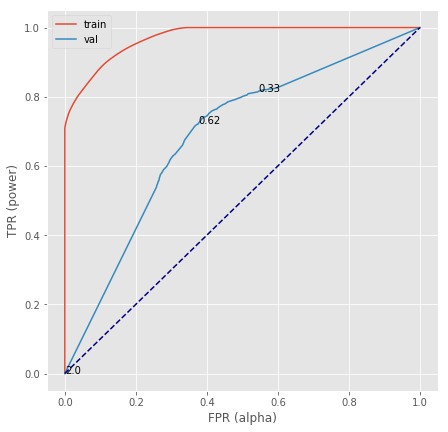

In [236]:
scores(dt, X_train_f, X_val, y_train_f, y_val)
roc_plot(dt, X_train_f, y_train_f, X_val, y_val)

### These roc curves are not too pretty. The training curve is very high suggesting a large degree of overfitting and the validation curve is way off so emphasising the poor performance of the model. Let's introduce GridSearchCV and hyperparameter tuning

In [293]:
param_grid_dt = {'max_depth': range(10,50+1,10 ), 'min_samples_leaf':[5,50,500]}

In [295]:
cv_dt = GridSearchCV(dt, param_grid_dt, cv=skf, scoring='roc_auc', return_train_score=True, n_jobs=-1)

cv_dt.fit(X_train_f, y_train_f)
best_cv_rfc = cv_dt.best_estimator_

cv_dt.best_params_

{'max_depth': 30, 'min_samples_leaf': 50}

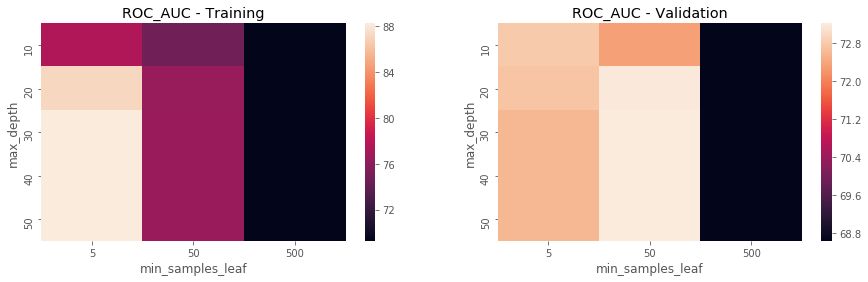

In [299]:
opt_plots(cv_dt);

train: 0.77 validation: 0.73


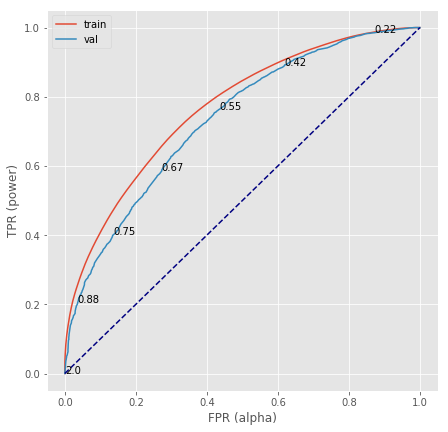

In [301]:
scores(cv_dt, X_train_f, X_val, y_train_f, y_val)
roc_plot(cv_dt, X_train_f, y_train_f, X_val, y_val)

In [302]:
#Hmm that looks too good to be true??

In [296]:
cv_dt.best_score_

0.73209854128249

In [330]:
#Let's tune up these parameters and see if we can improve the performance further. 
#We
param_grid_dt_a = {'max_depth': range(15,50+1,5 ), 'min_samples_leaf':[2,3,4,5,20,50]}

In [331]:
cv_dt_a = GridSearchCV(dt, param_grid_dt_a, cv=skf, scoring='roc_auc', return_train_score=True, n_jobs=-1)

cv_dt_a.fit(X_train_f, y_train_f)
best_cv_rfc = cv_dt_a.best_estimator_

cv_dt_a.best_params_

{'max_depth': 30, 'min_samples_leaf': 20}

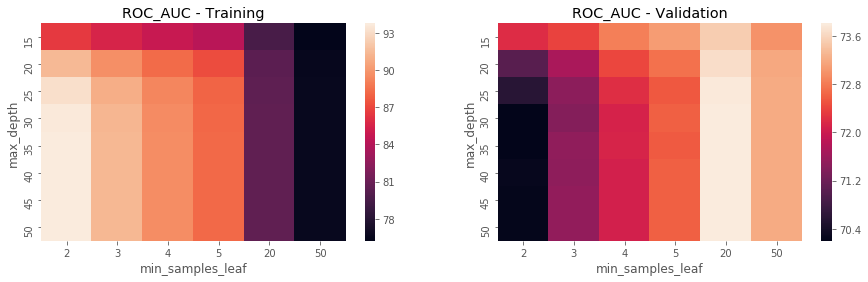

In [332]:
opt_plots(cv_dt_a);

train: 0.81 validation: 0.75


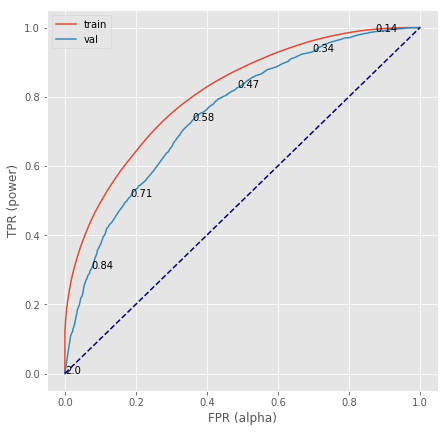

In [333]:
scores(cv_dt_a, X_train_f, X_val, y_train_f, y_val)
roc_plot(cv_dt_a, X_train_f, y_train_f, X_val, y_val)

In [ ]:
#Validation score is the one that matters

### Random Forests and GridSearchCV

In [224]:
#construct a param grid dictionary to pass to GridSearch
param_grid = {'max_depth': range(10,50+1,10 ), 'min_samples_leaf':[5,50,500]}

In [225]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [254]:
cv_rfc = GridSearchCV(rfc, param_grid, cv=skf, scoring='roc_auc', return_train_score=True, n_jobs=-1)

cv_rfc.fit(X_train_f, y_train_f)
best_cv_rfc = cv_rfc.best_estimator_

cv_rfc.best_params_

{'max_depth': 50, 'min_samples_leaf': 5}

In [272]:
pd.DataFrame(cv_rfc.cv_results_).head() #Expand to see our best params! 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.772720,0.029934,0.093975,0.002240,10,5,"{'max_depth': 10, 'min_samples_leaf': 5}",0.743594,0.734392,0.741144,0.746475,0.751390,0.743399,0.005649,5,0.765678,0.769257,0.769720,0.768984,0.766786,0.768085,0.001571
1,1.566163,0.051059,0.090742,0.004637,10,50,"{'max_depth': 10, 'min_samples_leaf': 50}",0.726040,0.717832,0.722936,0.727158,0.733086,0.725410,0.005018,10,0.734754,0.737425,0.736699,0.735734,0.733913,0.735705,0.001270
2,1.138651,0.009984,0.066697,0.000933,10,500,"{'max_depth': 10, 'min_samples_leaf': 500}",0.693525,0.687086,0.690771,0.695986,0.698052,0.693084,0.003863,11,0.695314,0.697641,0.699282,0.695845,0.693670,0.696350,0.001938
3,2.189049,0.031243,0.126136,0.005077,20,5,"{'max_depth': 20, 'min_samples_leaf': 5}",0.773189,0.763162,0.763979,0.769969,0.776982,0.769456,0.005300,4,0.822002,0.825730,0.826056,0.824485,0.823397,0.824334,0.001500
4,1.666276,0.029852,0.100308,0.006567,20,50,"{'max_depth': 20, 'min_samples_leaf': 50}",0.734834,0.723038,0.729235,0.733338,0.738342,0.731757,0.005248,9,0.745106,0.745911,0.744362,0.743078,0.740908,0.743873,0.001751


In [256]:
cv_rfc.best_score_

0.7710048836452926

,max_depth,min_samples_leaf,mean_test_score,std_test_score,mean_train_score,std_train_score
0,10,5,0.743399,0.005649,0.768085,0.001571
1,10,50,0.725410,0.005018,0.735705,0.001270
2,10,500,0.693084,0.003863,0.696350,0.001938
3,20,5,0.769456,0.005300,0.824334,0.001500
4,20,50,0.731757,0.005248,0.743873,0.001751
5,20,500,0.692981,0.003916,0.696281,0.001973
6,30,5,0.770914,0.005414,0.828807,0.001191
7,30,50,0.731865,0.005258,0.743946,0.001736
8,30,500,0.692981,0.003916,0.696281,0.001973
9,40,5,0.771005,0.005458,0.828918,0.001204


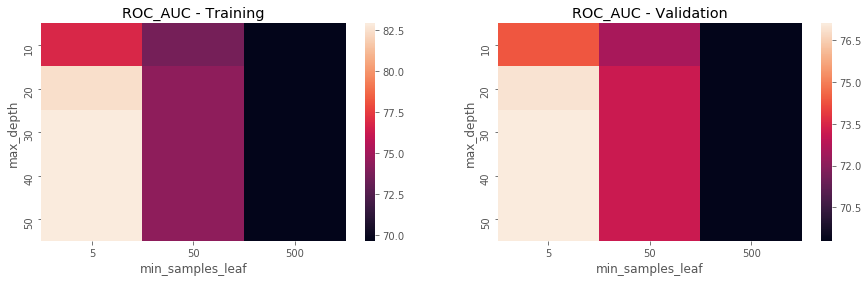

In [257]:
opt_plots(cv_rfc)

In [258]:
#Best params were max depth 50, min_samples_leaf 5

train: 0.83 validation: 0.78


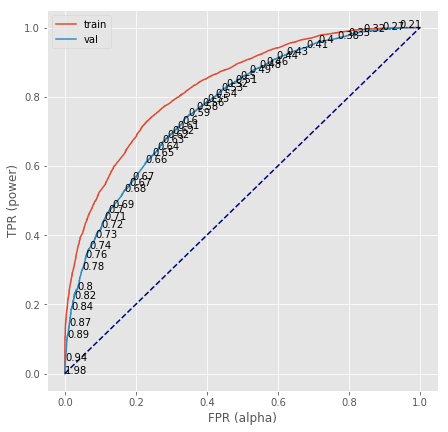

In [259]:
scores(cv_rfc,X_train_f,X_val,y_train_f,y_val)
roc_plot(cv_rfc,X_train_f, y_train_f, X_val, y_val) 

In [261]:
param_grid_a = {'max_depth': range(10,70+1,10 ), 'min_samples_leaf':[2,3,4,5,10,20,30,40]}

In [262]:
cv_rfc_a = GridSearchCV(rfc, param_grid_a, cv=skf, scoring='roc_auc', return_train_score=True, n_jobs=-1)

cv_rfc_a.fit(X_train_f, y_train_f)
best_cv_rfc = cv_rfc_a.best_estimator_

cv_rfc_a.best_params_

{'max_depth': 20, 'min_samples_leaf': 2}

In [267]:
#These parameters are strange in that the max_depth has reduced considerably and the min_samples_leaf is tending to 0.

In [263]:
cv_rfc_a.best_score_

0.7794661952896611

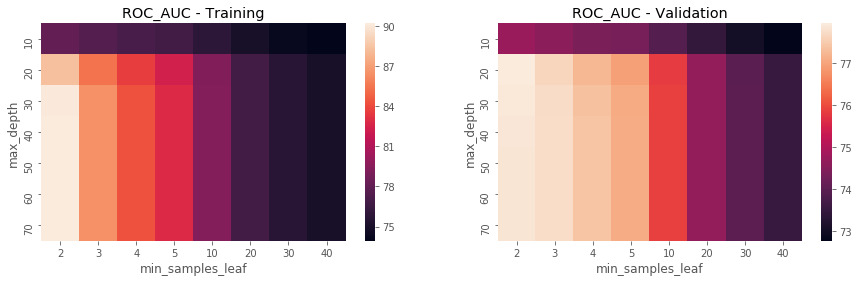

In [265]:
opt_plots(cv_rfc_a);

In [ ]:
#We can see from the opt plots that our zoom in seems to be heading toward an edge of min samples leaf!!

train: 0.88 validation: 0.79


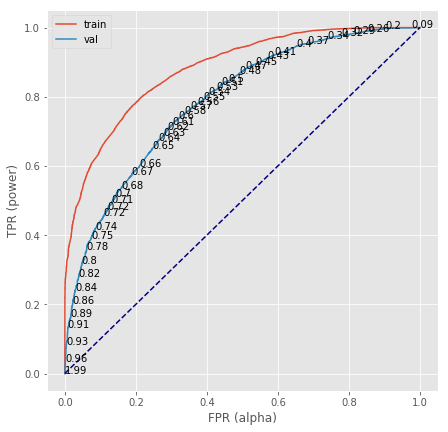

In [274]:
scores(cv_rfc_a,X_train_f,X_val,y_train_f,y_val)
roc_plot(cv_rfc_a,X_train_f, y_train_f, X_val, y_val) 

In [273]:
pd.DataFrame(cv_rfc_a.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.036874,0.019109,0.100625,0.002312,10,2,"{'max_depth': 10, 'min_samples_leaf': 2}",0.746904,0.740003,0.744580,0.749244,0.757884,0.747722,0.005928,31,0.778353,0.783102,0.782417,0.780934,0.780103,0.780982,0.001688
1,1.920981,0.108207,0.101314,0.001749,10,3,"{'max_depth': 10, 'min_samples_leaf': 3}",0.745839,0.737282,0.744200,0.748251,0.753885,0.745891,0.005412,38,0.772498,0.776256,0.776880,0.775856,0.773626,0.775023,0.001673
2,1.773907,0.007610,0.095690,0.001950,10,4,"{'max_depth': 10, 'min_samples_leaf': 4}",0.743167,0.735706,0.741958,0.746043,0.753215,0.744017,0.005705,39,0.768559,0.772447,0.771632,0.771959,0.769298,0.770779,0.001551
3,1.927253,0.063383,0.110372,0.010250,10,5,"{'max_depth': 10, 'min_samples_leaf': 5}",0.743594,0.734392,0.741144,0.746475,0.751390,0.743399,0.005649,40,0.765678,0.769257,0.769720,0.768984,0.766786,0.768085,0.001571
4,1.924153,0.017971,0.107638,0.002239,10,10,"{'max_depth': 10, 'min_samples_leaf': 10}",0.740114,0.730351,0.736944,0.741878,0.746751,0.739207,0.005448,47,0.757496,0.759475,0.760016,0.759341,0.757780,0.758822,0.000996
5,1.890929,0.019964,0.101425,0.001978,10,20,"{'max_depth': 10, 'min_samples_leaf': 20}",0.735813,0.726443,0.731968,0.736448,0.742608,0.734655,0.005338,54,0.749308,0.751202,0.751096,0.749000,0.748312,0.749784,0.001161
6,1.806848,0.036311,0.097479,0.001317,10,30,"{'max_depth': 10, 'min_samples_leaf': 30}",0.731346,0.722407,0.727500,0.732151,0.739006,0.730481,0.005482,55,0.742312,0.744285,0.743307,0.743142,0.742126,0.743034,0.000774
7,1.762954,0.014097,0.098484,0.004204,10,40,"{'max_depth': 10, 'min_samples_leaf': 40}",0.728556,0.719512,0.724169,0.730835,0.735730,0.727760,0.005559,56,0.738249,0.741033,0.739187,0.740230,0.737885,0.739317,0.001182
8,3.188367,0.015575,0.161189,0.003921,20,2,"{'max_depth': 20, 'min_samples_leaf': 2}",0.781346,0.774523,0.773763,0.780142,0.787560,0.779466,0.005029,1,0.882291,0.883147,0.883772,0.883961,0.883197,0.883274,0.000585
9,2.948692,0.054838,0.156616,0.003478,20,3,"{'max_depth': 20, 'min_samples_leaf': 3}",0.781025,0.770824,0.770565,0.775671,0.785037,0.776624,0.005682,12,0.853085,0.853262,0.855642,0.854167,0.853431,0.853917,0.000938
